In [ ]:
import os
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt


startday = '2/26/20'

plotfiles = ['plot2.png','plot3.png','plot4.png','plot5.png','plot6.png','plot7.png','plot8.png',
                'plot9.png','plot10.png','plot11.png','plot12.png','plot13.png','plot14.png','plot15.png']


In [ ]:
startday

'2/26/20'

In [ ]:
plotfiles

['plot2.png',
 'plot3.png',
 'plot4.png',
 'plot5.png',
 'plot6.png',
 'plot7.png',
 'plot8.png',
 'plot9.png',
 'plot10.png',
 'plot11.png',
 'plot12.png',
 'plot13.png',
 'plot14.png',
 'plot15.png']

In [ ]:
import os
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt


startday = '2/26/20'

plotfiles = ['plot2.png','plot3.png','plot4.png','plot5.png','plot6.png','plot7.png','plot8.png',
                'plot9.png','plot10.png','plot11.png','plot12.png','plot13.png','plot14.png','plot15.png']
def segmenta(df,paises,status, wtodo,startday,cumulativo):
    status = df['Status'] == status
    country = df["Country/Region"].isin(paises)
    df_Country = df[ country & status]
    df_G = df_Country.groupby(['Country/Region','Status']).sum(axis=0)
    df_GT = df_G.transpose().copy()
    df_GT = df_GT.loc[startday:]
#    if cumulativo=='Acumudado':
#        df_GT = df_GT.cumsum()

    df_G = df_GT.copy()

    if wtodo==1:
        df_G = (df_GT)/(df_GT.max())

    return df_G

def segmenta_rate(df,paises,status, wtodo,startday,cumulativo):

    country = df["Country/Region"].isin(paises)
    df_Country = df[country]
    #Fale todas as row que a coluna Country/Region tenha alguns dos valores
    df_G = df_Country.groupby(['Country/Region','Status']).sum(axis=0)
    df_GT = df_G.transpose().copy()
    df_GT = df_GT.loc[startday:]
    print(df_GT.tail(3))

#    if cumulativo=='Acumudado':
#        df_GT = df_GT.cumsum()

    df_r = (df_GT.xs('deaths',axis=1, level=1)*100)/df_GT.xs('confirmed',axis=1, level=1)
    print(df_r.tail(3))
    df_G = df_r.copy()

    return df_G

df0 = pd.read_csv("time_series_covid_19_confirmed.csv")
df1 = pd.read_csv("time_series_covid_19_deaths.csv")
df2 = pd.read_csv("time_series_covid_19_recovered.csv")

df0['Status']='confirmed'
df1['Status']='deaths'
df2['Status']='recovered'

In [ ]:
print(df.head(15))
dfA=df.head(15).groupby(['Country/Region']).mean()
print(dfA)

         Country/Region  1/22/20  1/23/20  ...  3/30/20  3/31/20     Status
0           Afghanistan        0        0  ...      170      174  confirmed
1               Albania        0        0  ...      223      243  confirmed
2               Algeria        0        0  ...      584      716  confirmed
3               Andorra        0        0  ...      370      376  confirmed
4                Angola        0        0  ...        7        7  confirmed
5   Antigua and Barbuda        0        0  ...        7        7  confirmed
6             Argentina        0        0  ...      820     1054  confirmed
7               Armenia        0        0  ...      482      532  confirmed
8             Australia        0        0  ...       78       80  confirmed
9             Australia        0        0  ...     2032     2032  confirmed
10            Australia        0        0  ...       15       17  confirmed
11            Australia        0        0  ...      689      743  confirmed
12          

In [ ]:
paises = ['Brazil','France','US','Germany']
#paises = ['Brazil']

grava=True
keydrop =[df.columns[0],df.columns[2],df.columns[3]]
# limpa colunas que não serão usadas
df.drop(columns= keydrop, axis=1, inplace = True)



status_list = ['confirmed','deaths','recovered']
wtodo = [0,1]
wtodo_desc = ['Absoluto','Normalizado','Mortes/Casos']
conta=-1
cumu = ["Acumulado"]


for Acumulado in cumu:
    for todo in wtodo:
        for sta in status_list:
            df_P = segmenta(df,paises,sta,todo,startday,Acumulado)
            df_P.plot(kind='line', stacked=True,figsize=(18.5, 10.5), grid=True)
            indexVector = pd.to_datetime(df_P.index).strftime('%d-%m-%Y')
            plt.xticks(np.arange(len(df_P)), indexVector)
            plt.xticks(rotation=90)
            plt.title('Crescimento '+ Acumulado + ' do Coronavirus: '+wtodo_desc[todo])
            conta += 1
            if grava:
                plt.savefig(os.path.join(plotfiles[conta]), dpi=300, format='png', bbox_inches='tight')

In [ ]:
status = df['Status'] == 'confirmed'
country = df["Country/Region"].isin(paises)

df_Country = df[ country & status ]
df_G = df_Country.groupby(['Country/Region','Status']).sum()
print(status.head(30),country.head(30))
print(df_Country)
print(df_G)

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
18    True
19    True
20    True
21    True
22    True
23    True
24    True
25    True
26    True
27    True
28    True
29    True
Name: Status, dtype: bool 0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28     True
29    False
Name: Country/Region, dtype: bool
    Country/Region  1/22/20  1/23/20  ...  3/30/20  3/31/20     Status
28          Brazil        0        0  ...     4579     5717  confirmed
107         France        0        0  ...       43       43  confirmed
108         France        0        0 

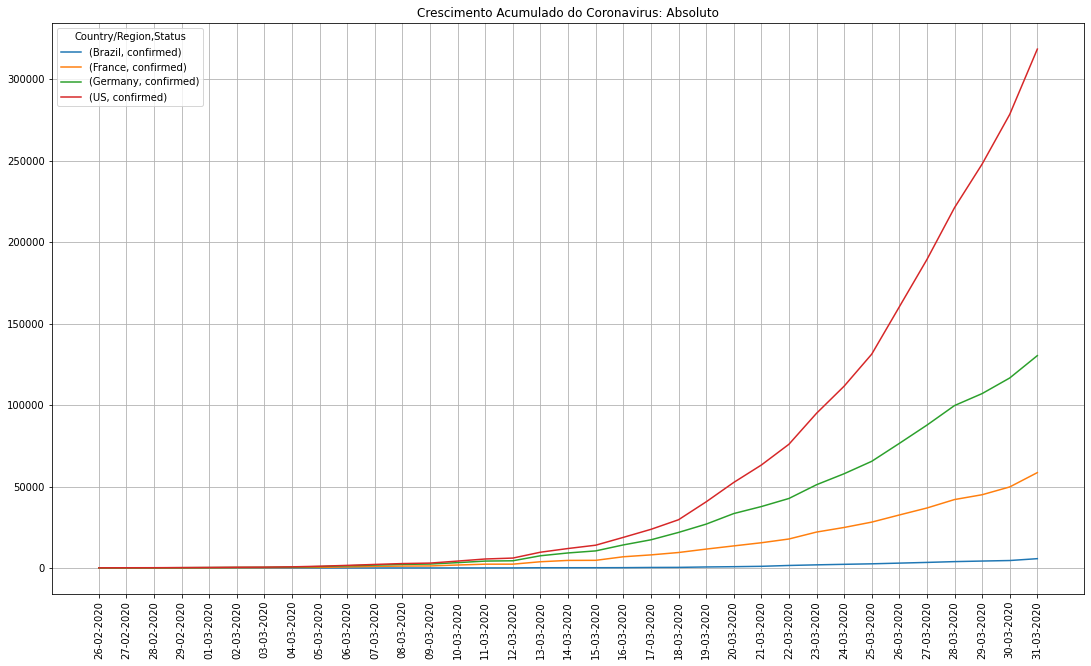

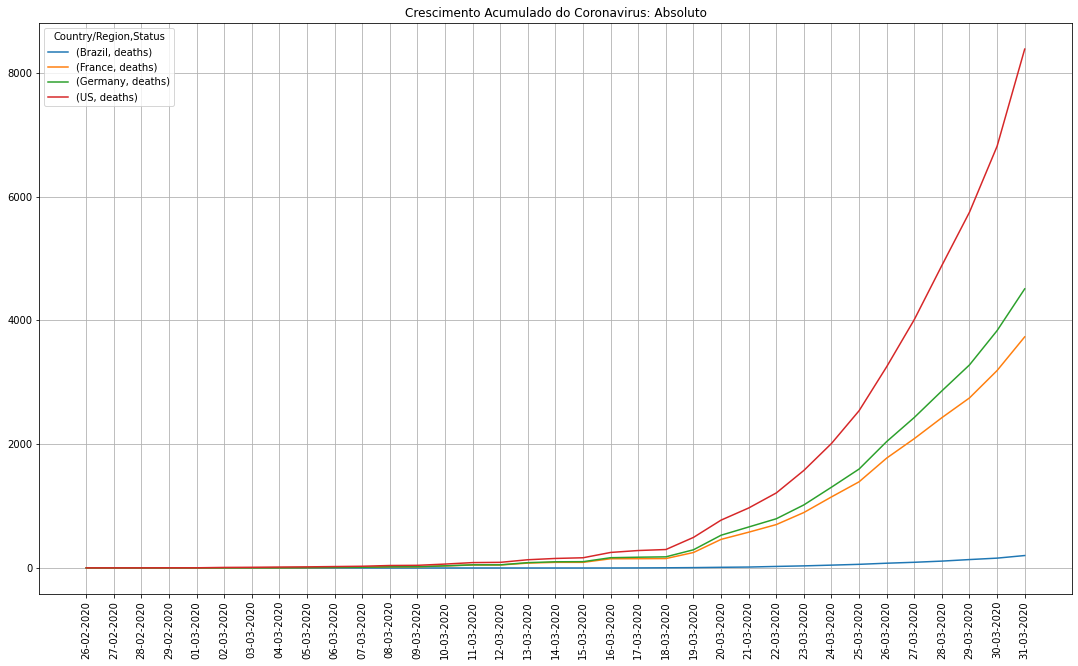

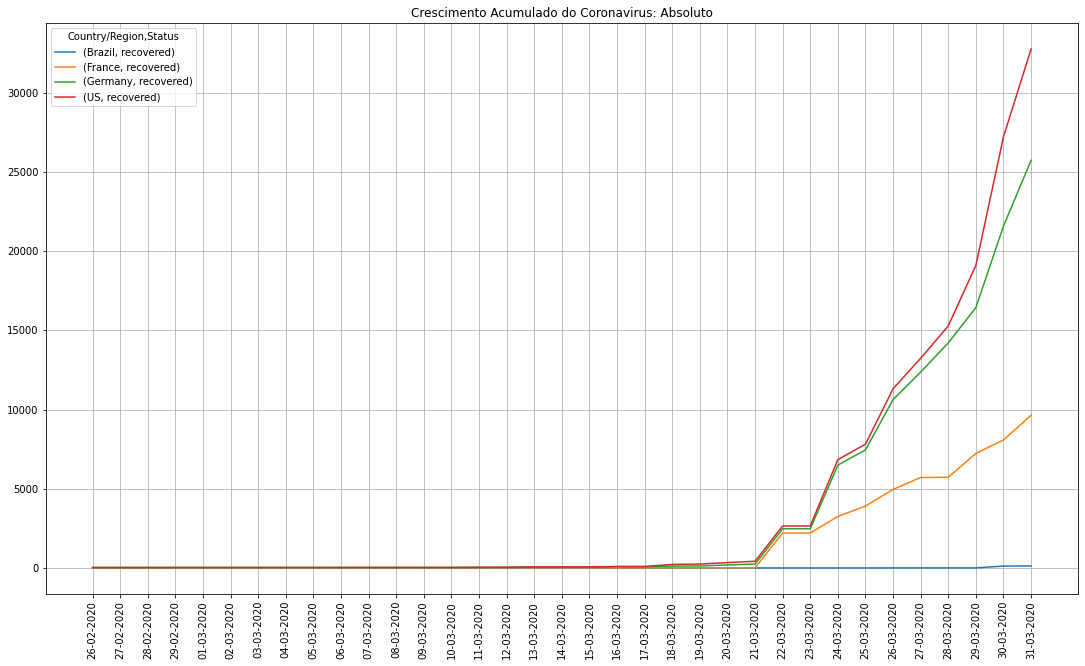

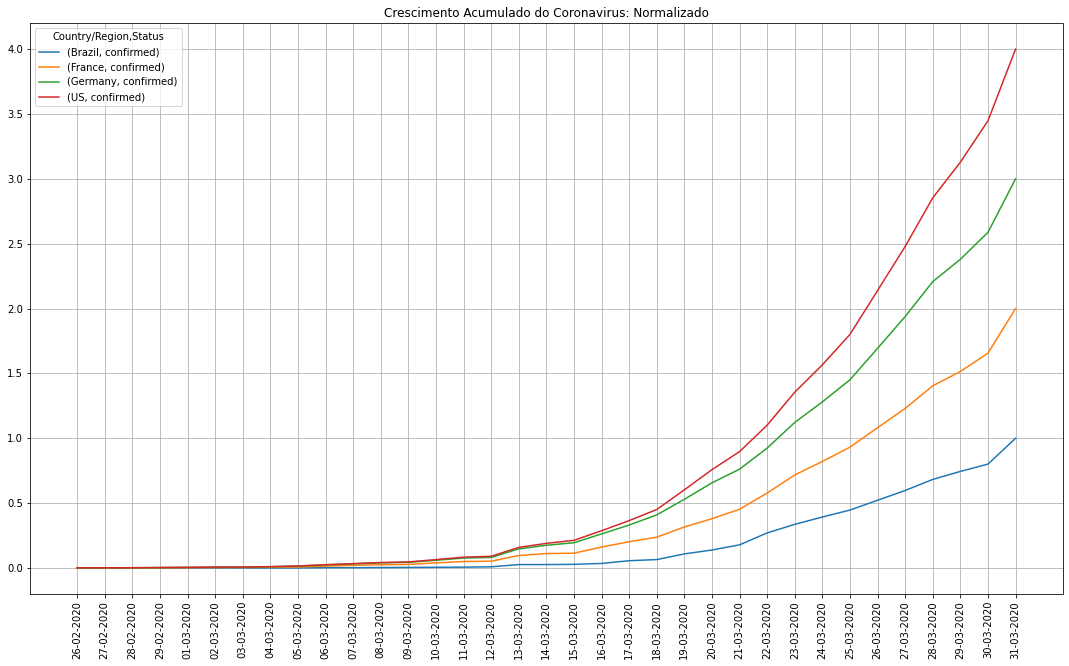

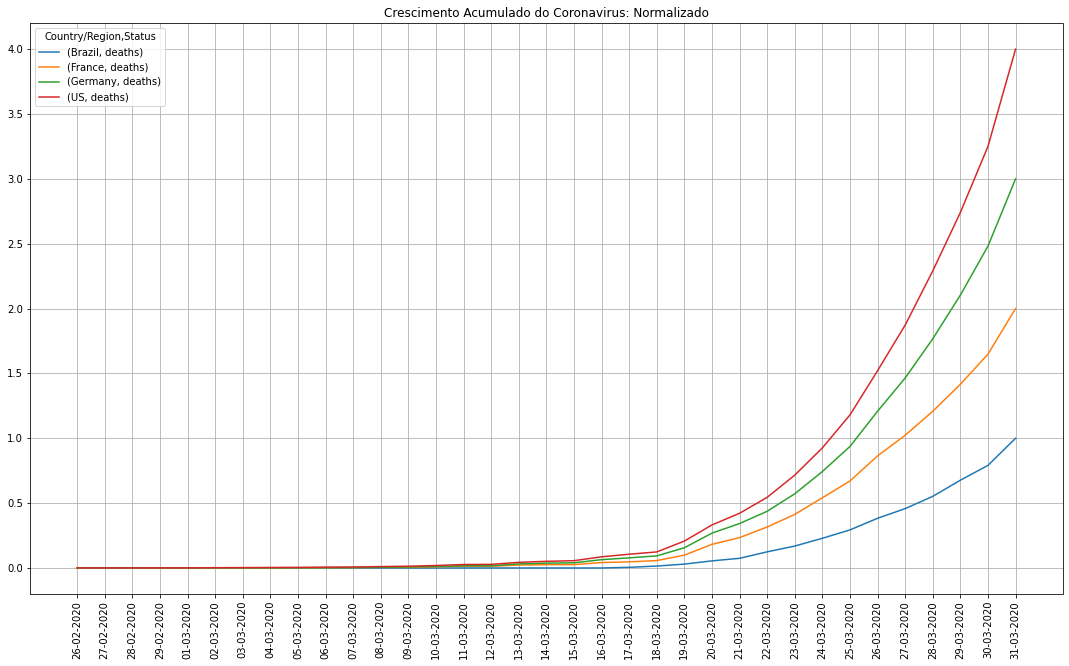

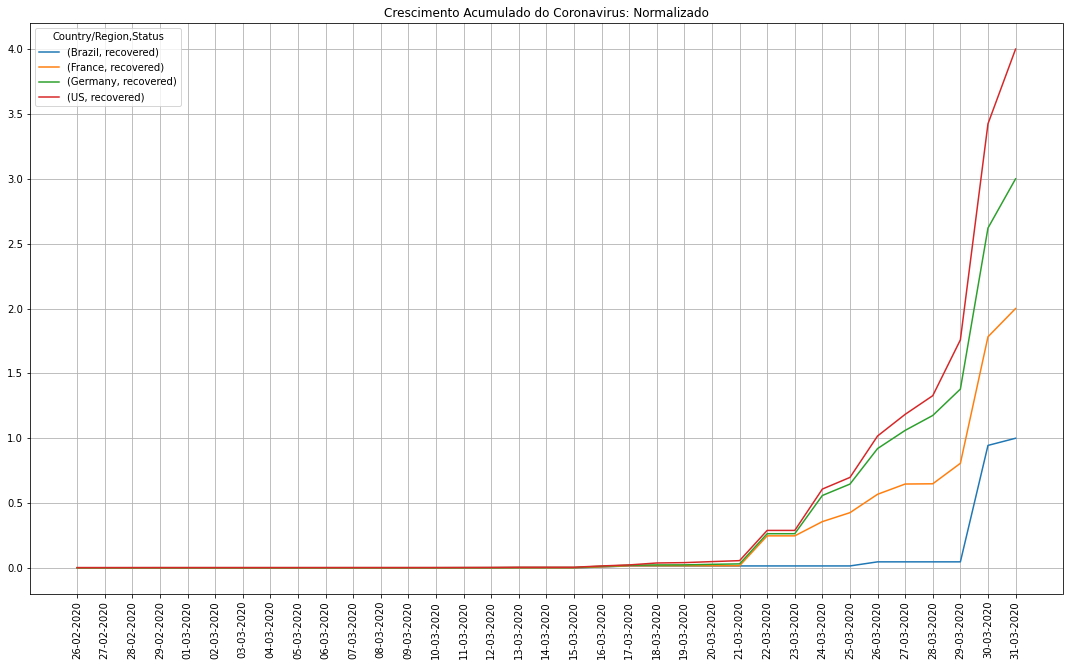

Country/Region    Brazil                   ...        US                 
Status         confirmed deaths recovered  ... confirmed deaths recovered
3/29/20             4256    136         6  ...    140886   2467      2665
3/30/20             4579    159       120  ...    161807   2978      5644
3/31/20             5717    201       127  ...    188172   3873      7024

[3 rows x 12 columns]
Country/Region    Brazil    France   Germany        US
3/29/20         3.195489  6.413973  0.858362  1.751061
3/30/20         3.472374  6.707992  0.964342  1.840464
3/31/20         3.515830  6.685975  1.079267  2.058223


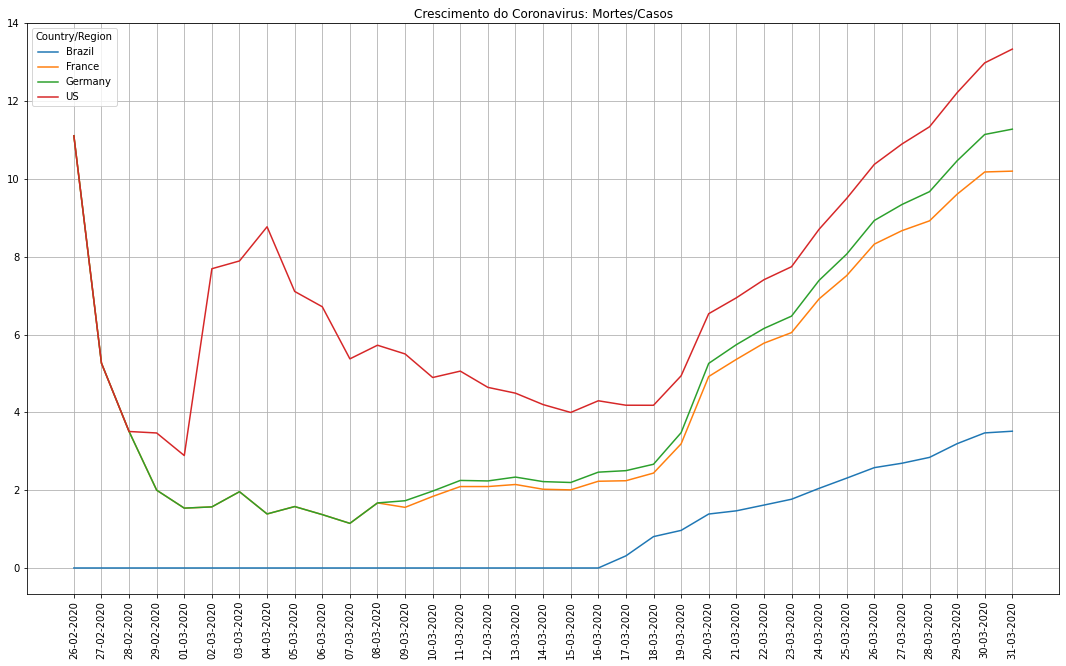

In [ ]:
import os
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt


startday = '2/26/20'

plotfiles = ['plot2.png','plot3.png','plot4.png','plot5.png','plot6.png','plot7.png','plot8.png',
                'plot9.png','plot10.png','plot11.png','plot12.png','plot13.png','plot14.png','plot15.png']
def segmenta(df,paises,status, wtodo,startday,cumulativo):
    status = df['Status'] == status
    country = df["Country/Region"].isin(paises)
    df_Country = df[ country & status]
    df_G = df_Country.groupby(['Country/Region','Status']).sum()
    df_GT = df_G.transpose().copy()
    df_GT = df_GT.loc[startday:]
#    if cumulativo=='Acumudado':
#        df_GT = df_GT.cumsum()

    df_G = df_GT.copy()

    if wtodo==1:
        df_G = (df_GT)/(df_GT.max())

    return df_G

def segmenta_rate(df,paises,status, wtodo,startday,cumulativo):

    country = df["Country/Region"].isin(paises)
    df_Country = df[country]
    df_G = df_Country.groupby(['Country/Region','Status']).sum()
    df_GT = df_G.transpose().copy()
    df_GT = df_GT.loc[startday:]
    print(df_GT.tail(3))

#    if cumulativo=='Acumudado':
#        df_GT = df_GT.cumsum()

    df_r = (df_GT.xs('deaths',axis=1, level=1)*100)/df_GT.xs('confirmed',axis=1, level=1)
    print(df_r.tail(3))
    df_G = df_r.copy()

    return df_G

df0 = pd.read_csv("time_series_covid_19_confirmed.csv")
df1 = pd.read_csv("time_series_covid_19_deaths.csv")
df2 = pd.read_csv("time_series_covid_19_recovered.csv")

df0['Status']='confirmed'
df1['Status']='deaths'
df2['Status']='recovered'

df = df0.copy()
df = df.append(df1, ignore_index=True)
df = df.append(df2, ignore_index=True)

paises = ['Brazil','France','US','Germany']
#paises = ['Brazil']

grava=True
keydrop =[df.columns[0],df.columns[2],df.columns[3]]
# limpa colunas que não serão usadas
df.drop(columns= keydrop, axis=1, inplace = True)



status_list = ['confirmed','deaths','recovered']
wtodo = [0,1]
wtodo_desc = ['Absoluto','Normalizado','Mortes/Casos']
conta=-1
cumu = ["Acumulado"]

for Acumulado in cumu:
    for todo in wtodo:
        for sta in status_list:
            df_P = segmenta(df,paises,sta,todo,startday,Acumulado)
            df_P.plot(kind='line', stacked=True,figsize=(18.5, 10.5), grid=True)
            indexVector = pd.to_datetime(df_P.index).strftime('%d-%m-%Y')
            plt.xticks(np.arange(len(df_P)), indexVector)
            plt.xticks(rotation=90)
            plt.title('Crescimento '+ Acumulado + ' do Coronavirus: '+wtodo_desc[todo])
            conta += 1
            if grava:
                plt.savefig(os.path.join(plotfiles[conta]), dpi=300, format='png', bbox_inches='tight')
plt.show()
todo=2

df_P = segmenta_rate(df,paises,sta,todo,startday,Acumulado)
df_P.plot(kind='line', stacked=True,figsize=(18.5, 10.5), grid=True)
indexVector = pd.to_datetime(df_P.index).strftime('%d-%m-%Y')
plt.xticks(np.arange(len(df_P)), indexVector)
plt.xticks(rotation=90)
plt.title('Crescimento do Coronavirus: '+wtodo_desc[todo])

conta += 1
if grava:
    plt.savefig(os.path.join(plotfiles[conta]), dpi=300, format='png', bbox_inches='tight')

plt.show()
